In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

Selecting as resources just Omnipath

In [2]:
omnipath = op.interactions.OmniPath().get()

First set the folder for input and output

In [3]:
data_folder = "../../../data/"

figures_folder = "../../Figures/WNT/"

sif_output = "../../sif_files/WNT/"

Loading the data from Antoine

In [4]:
data = pd.read_csv(data_folder + "Northcott_Lin_genes.csv")

In [5]:
wnt_list = data["WNT"].reset_index(drop=True).to_list()

Selecting just WNT group

In [6]:
wnt_list

['CTNNB1',
 'APC',
 'CSNK2B',
 'ARID1A',
 'ARID2',
 'ATM',
 'PIK3CA',
 'BAI3',
 'EPHA7',
 'DDX3X',
 'SYNCRIP',
 'ALX4',
 'DLX3',
 'DLX4',
 'EMX2',
 'EN1',
 'FOXF1',
 'HOMEZ',
 'HOXC4',
 'HOXC5',
 'HOXD11',
 'HOXD13',
 'HOXD8',
 'HOXD9',
 'IRX2',
 'IRX5',
 'LEF1',
 'LHX8',
 'MAF',
 'MSX2',
 'NKX6-1',
 'ONECUT2',
 'OSR2',
 'PAX3',
 'PITX1',
 'PRRX1',
 'RUNX2',
 'SHOX2']

# Creating a Network starting from All Omnipath interactions

In [7]:
wnt_net = Network(wnt_list, resources = omnipath)

Error: node ARID2 is not present in the resources database
Error: node BAI3 is not present in the resources database
Error: node DLX4 is not present in the resources database
Error: node EN1 is not present in the resources database
Error: node HOXC4 is not present in the resources database
Error: node HOXC5 is not present in the resources database
Error: node HOXD8 is not present in the resources database
Error: node IRX5 is not present in the resources database
Error: node LHX8 is not present in the resources database
Error: node OSR2 is not present in the resources database


In [8]:
wnt_net.add_node("ADGRB3")

Error: node ADGRB3 is not present in the resources database


Adding the node that were not found manually: HOXDB13 --> HOXD13, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [9]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,CTNNB1,P35222,NaN
1,APC,P25054,NaN
2,CSNK2B,P67870,NaN
3,ARID1A,O14497,NaN
4,ATM,Q13315,NaN
5,PIK3CA,P42336,NaN
6,EPHA7,Q15375,NaN
7,DDX3X,O00571,NaN
8,SYNCRIP,O60506,NaN
9,ALX4,Q9H161,NaN


In [10]:
%%time
wnt_net.complete_connection(maxlen=3, only_signed=True, connect_with_bias=False, consensus=True)

CPU times: user 10.1 s, sys: 3.66 ms, total: 10.1 s
Wall time: 10.2 s


In [11]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,CTNNB1,P35222,NaN
1,APC,P25054,NaN
2,CSNK2B,P67870,NaN
3,ARID1A,O14497,NaN
4,ATM,Q13315,NaN
...,...,...,...
69,LAT,O43561,NaN
70,PRKCA,P17252,NaN
71,MAPK1,P28482,NaN
72,BTK,Q06187,NaN


In [12]:
wnt_net.convert_edgelist_into_genesymbol()

,source,target,Type,Effect,References
0,APC,CTNNB1,None,bimodal,BioGRID:10545404;BioGRID:11533658;BioGRID:2166...
1,CSNK2B,CTNNB1,None,stimulation,HPRD-phos:12432063;HPRD:12432063;KEA:12432063;...
2,ATM,SIAH1,None,inhibition,ACSN:11877377;ACSN:12607003;ACSN:15459660;ACSN...
3,SIAH1,CTNNB1,None,inhibition,BioGRID:28481365;BioGRID:32671611;SPIKE:113898...
4,ATM,ABL1,None,stimulation,ACSN:11804596;ACSN:11877377;ACSN:12607003;ACSN...
...,...,...,...,...,...
234,MAPK1,PPP2R5C,None,inhibition,ProtMapper:16456541;SIGNOR:16456541;SPIKE_LC:1...
235,PRKCA,GSK3A,None,inhibition,CA1:1324914;CA1:14556709;HPRD-phos:11035810;HP...
236,MAPK1,SP1,None,stimulation,ACSN:16079281;ACSN:18775330;ACSN:8226933;ACSN:...
237,PRKCA,MAPK1,None,stimulation,ProtMapper:11704645;ProtMapper:12598525;ProtMa...


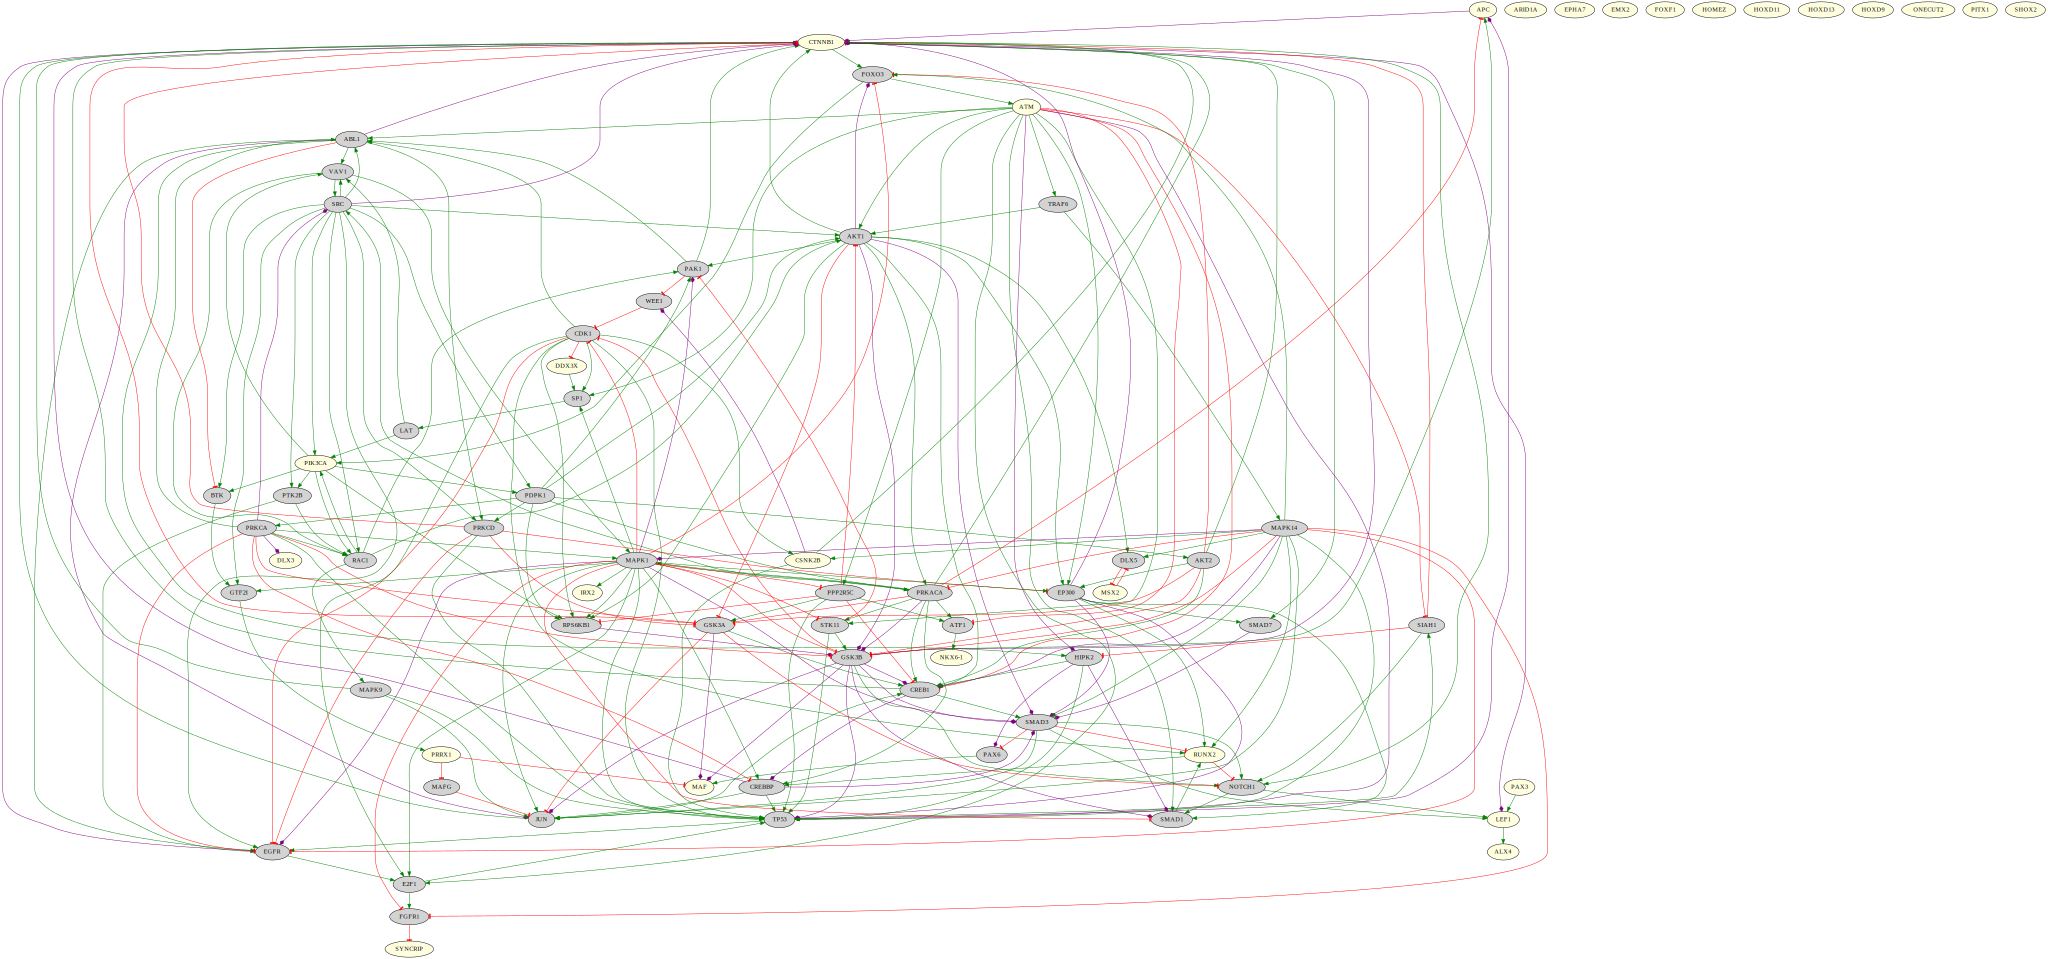

In [13]:
wnt_visualizer = NetworkVisualizer(wnt_net,color_by='effect', noi=True)
output = figures_folder + "WNT_omnipath_northcott"
wnt_visualizer.render(output_file=output)

# Using BFS - too many disconnected nodes, very disappointing

In [14]:
wnt_net_bfs = Network(wnt_list, resources = omnipath)

Error: node ARID2 is not present in the resources database
Error: node BAI3 is not present in the resources database
Error: node DLX4 is not present in the resources database
Error: node EN1 is not present in the resources database
Error: node HOXC4 is not present in the resources database
Error: node HOXC5 is not present in the resources database
Error: node HOXD8 is not present in the resources database
Error: node IRX5 is not present in the resources database
Error: node LHX8 is not present in the resources database
Error: node OSR2 is not present in the resources database


In [15]:
%%time
wnt_net_bfs.complete_connection(maxlen=4, algorithm="bfs", only_signed=False, connect_with_bias=False, consensus=False)

CPU times: user 8.93 s, sys: 1.88 ms, total: 8.93 s
Wall time: 8.93 s


In [16]:
wnt_net_bfs.edges

,source,target,Type,Effect,References
0,P25054,P35222,None,bimodal,BioGRID:10545404;BioGRID:11533658;BioGRID:2166...
1,P35222,Q92793,None,bimodal,BioGRID:16476742;HPRD:11973335;Lit-BM-17:16476...
2,Q92793,P04637,None,stimulation,ACSN:15279786;ACSN:17303408;ACSN:17660363;ACSN...
3,P04637,P25054,None,bimodal,SPIKE:18431400;SPIKE_LC:18431400; SPIKE:184314...
4,P67870,P35222,None,stimulation,HPRD-phos:12432063;HPRD:12432063;KEA:12432063;...
...,...,...,...,...,...
237,Q9NRM7,P00519,None,undefined,PhosphoSite:23852372
238,P00519,P05412,None,bimodal,HPRD-phos:10637231;HPRD:10637231;InnateDB:1861...
239,P06241,P00519,None,stimulation,Adhesome:17474147;DOMINO:17474147;KEA:12522270...
240,P41240,P05412,None,undefined,Lit-BM-17:16740711;Lit-BM-17:19818398;ProtMapp...


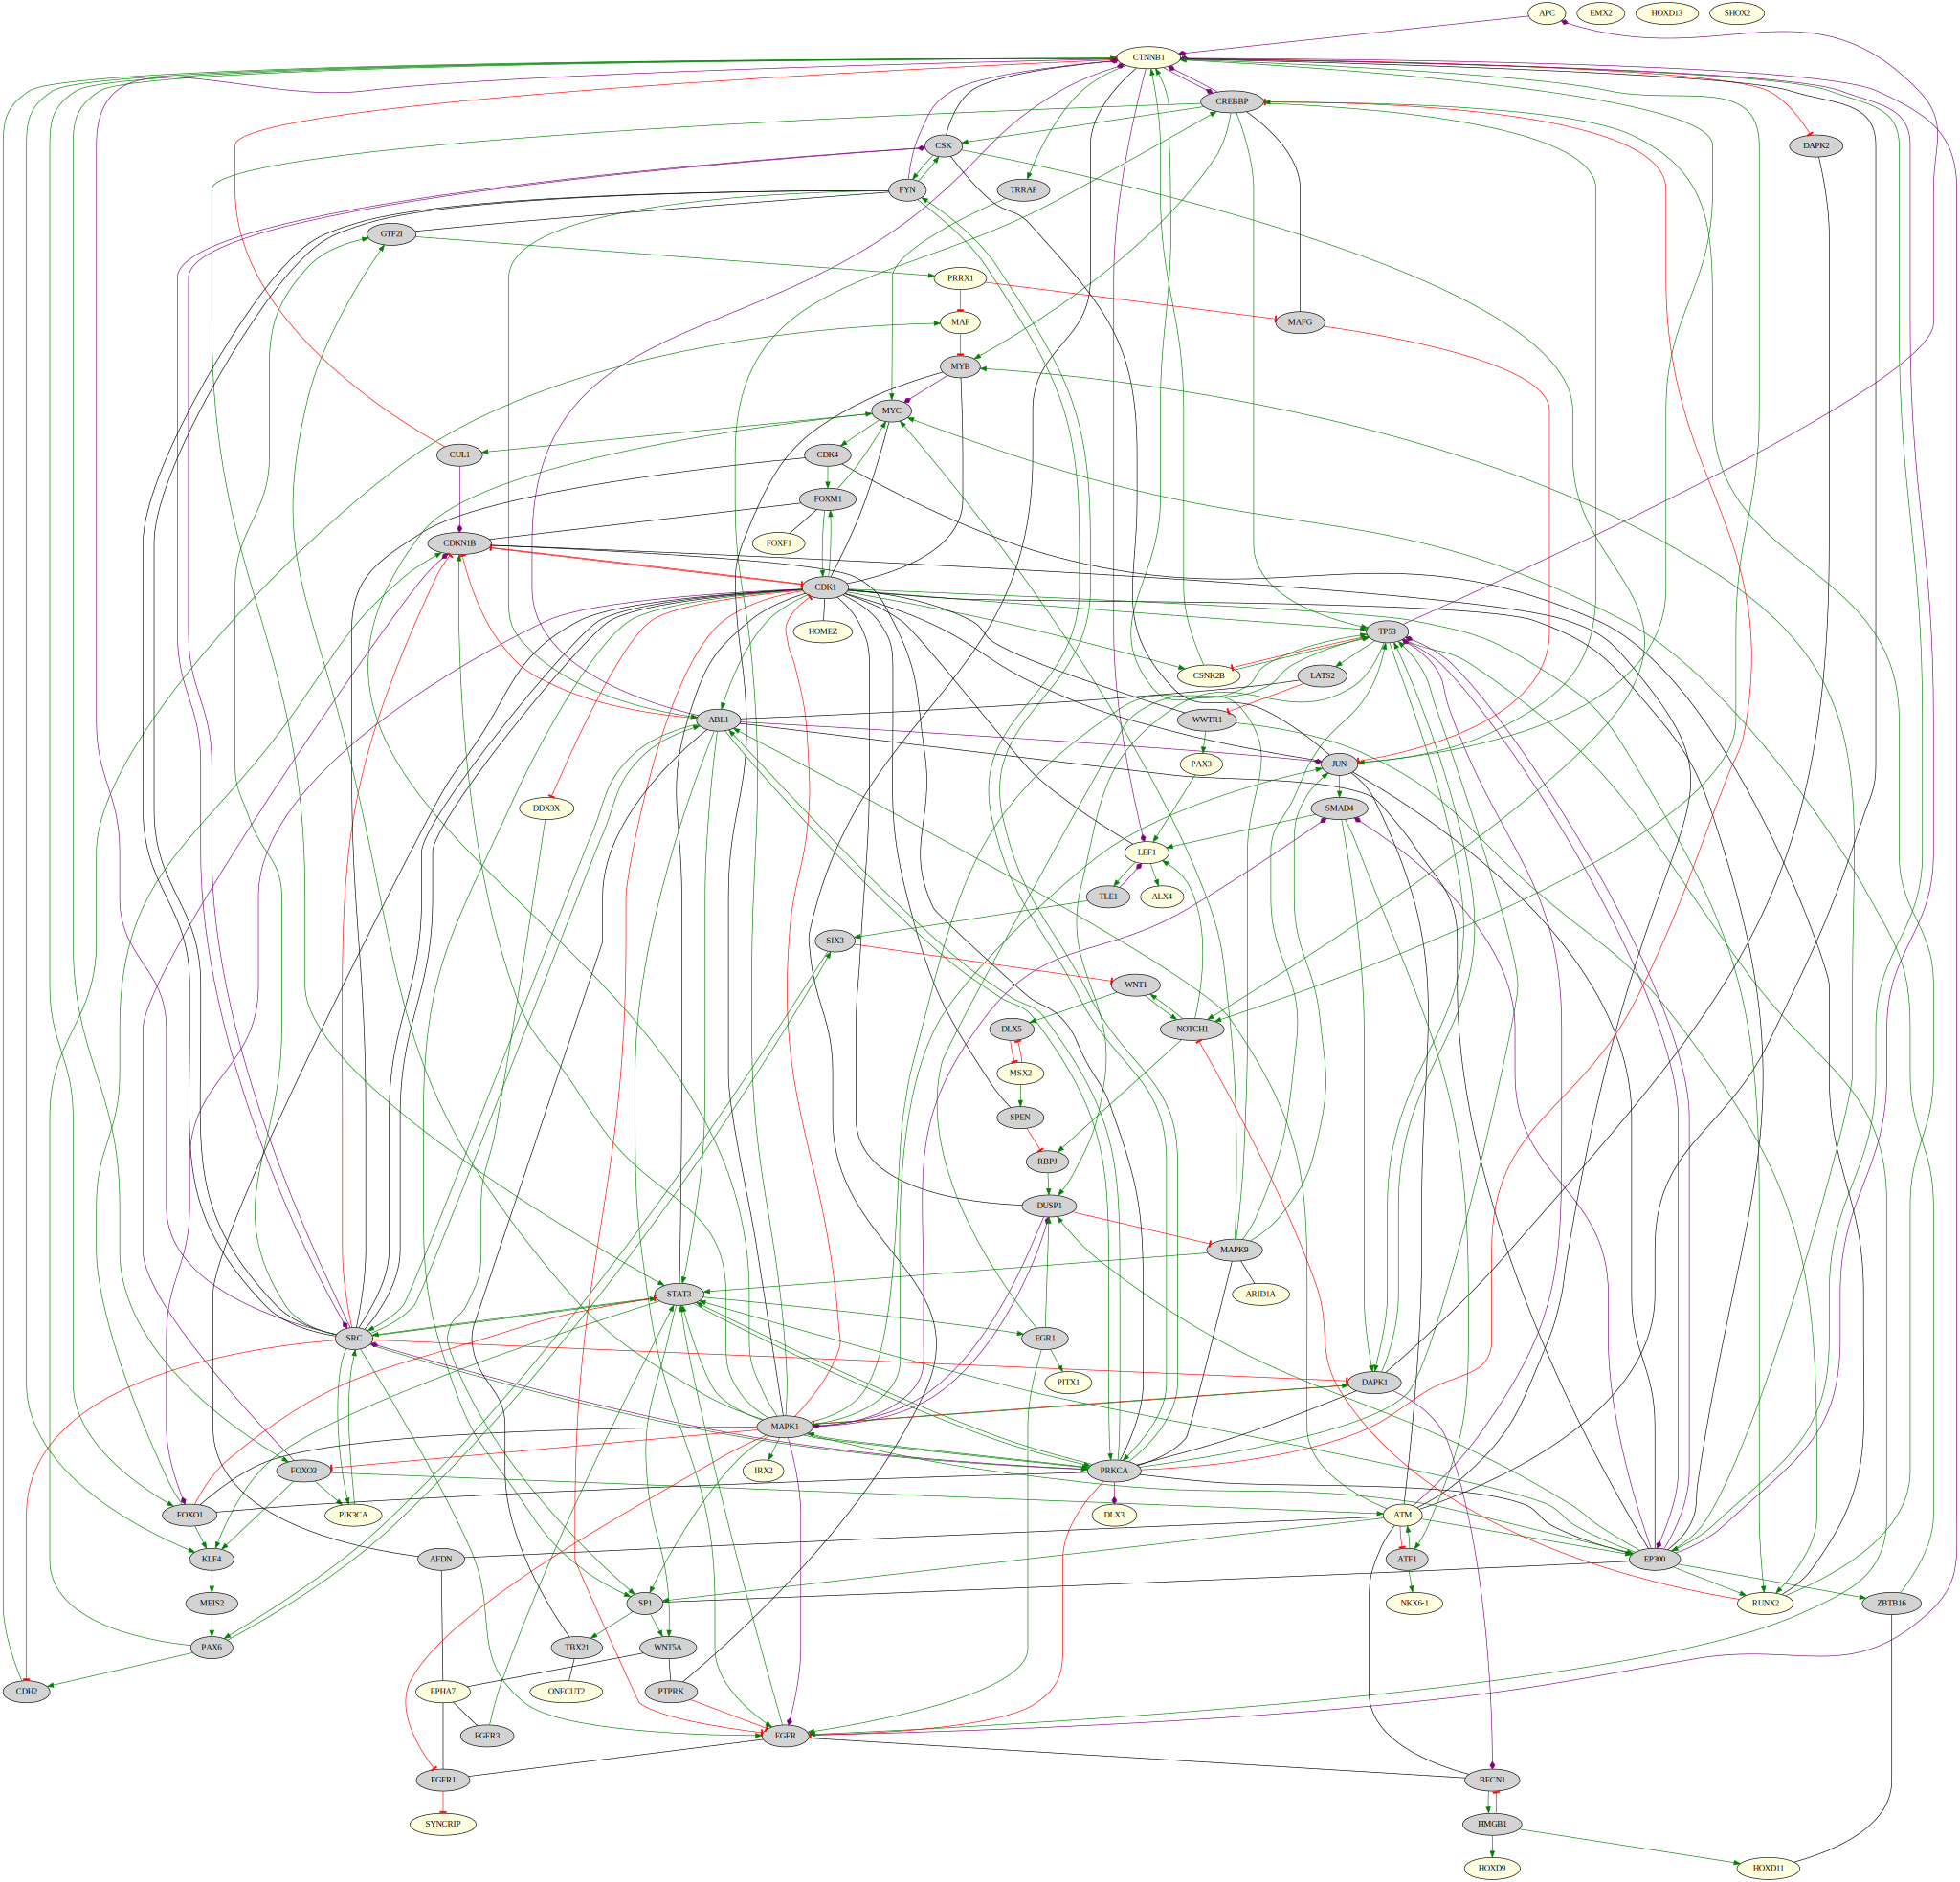

In [17]:
wnt_visualizer_bfs = NetworkVisualizer(wnt_net_bfs,color_by='effect', noi=True)
output = figures_folder + "WNT_omnipath_Northcott_bfs"
wnt_visualizer_bfs.render(output_file=output)

# Exporting Network in sif file

In order to export a fully connected network in sif file, I remove the nodes that are not connected

In [18]:
from neko._outputs.exports import Exports

In [19]:
for node in wnt_net.nodes["Uniprot"]:
    if node not in wnt_net.edges["source"].values and node not in wnt_net.edges["target"].values:
        node = wnt_net.nodes[ wnt_net.nodes["Uniprot"] == node]["Genesymbol"].values
        print( node)
        wnt_net.remove_node(node[0])

['ARID1A']
['EPHA7']
['EMX2']
['FOXF1']
['HOMEZ']
['HOXD11']
['HOXD13']
['HOXD9']
['ONECUT2']
['PITX1']
['SHOX2']


In [20]:
export = Exports(wnt_net)

In [21]:
export.export_sif(sif_output + "WNT_omnipath_northcott.sif")